In [1]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

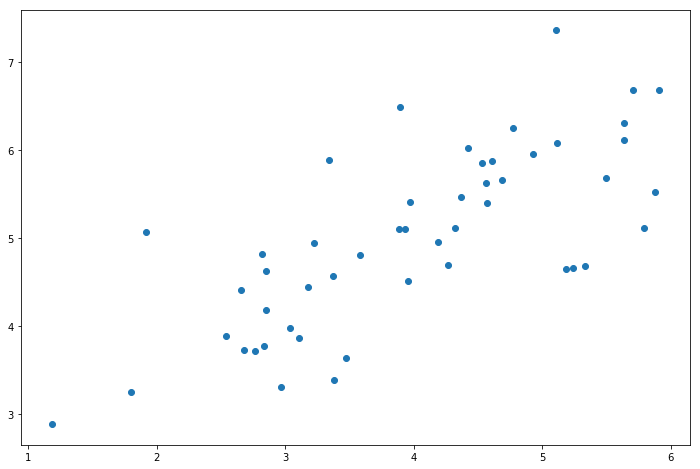

In [2]:
data = sio.loadmat('ex7data1.mat')
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1])

In [3]:
def featureNormalize(X):
    mu = X.mean(0)
    sig = X.std(0)
    return (X-X.mean())/float(X.std()),mu,sig

def pca(X):
    m = X.shape[0]
    cov = (1.0/m)*X.T.dot(X)
    U,S,V = np.linalg.svd(cov)
    return U,S,V

In [4]:
X_norm,mu,sig = featureNormalize(X)
U,S,V = pca(X_norm)
print U
print S

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]
[ 1.43584536  0.56415464]


In [5]:
def projectData(X,U,K):
    return X.dot(U[:,:K])

K = 1
Z = projectData(X_norm,U,K)
Z

array([[ 1.29667774],
       [-0.71033434],
       [ 1.25612466],
       [ 1.53744654],
       [ 1.25029805],
       [-0.61207992],
       [ 1.11082635],
       [-2.04206316],
       [ 0.06819419],
       [-0.61554135],
       [-0.50907916],
       [-0.40790166],
       [-0.03212402],
       [-0.57721639],
       [ 1.46419208],
       [-1.67294439],
       [-0.71891684],
       [ 1.01880684],
       [-1.86019089],
       [-0.52904865],
       [-1.90770957],
       [ 0.44851986],
       [-1.5783646 ],
       [ 0.05518813],
       [ 1.60243855],
       [ 0.61221494],
       [-1.02632779],
       [-1.16595669],
       [ 0.94329831],
       [ 0.09364089],
       [ 0.05106786],
       [-1.43280887],
       [ 1.24221343],
       [-0.64463155],
       [ 0.7036968 ],
       [-1.07749905],
       [ 1.5885565 ],
       [-1.26283444],
       [ 2.41327965],
       [-0.19777117],
       [-0.72689441],
       [ 0.898248  ],
       [ 1.22685301],
       [-0.77705546],
       [ 1.61724833],
       [-0

In [6]:
def recoverData(Z,U,K):
    return Z.dot(U[:,:K].T)

X_rec = recoverData(Z,U,K)
X_rec

array([[-1.0275101 , -0.79094638],
       [ 0.56288134,  0.43328913],
       [-0.99537513, -0.76620984],
       [-1.2182995 , -0.93781032],
       [-0.99075802, -0.76265573],
       [ 0.48502282,  0.37335599],
       [-0.88023821, -0.6775809 ],
       [ 1.61816653,  1.24561593],
       [-0.05403827, -0.04159703],
       [ 0.48776572,  0.37546738],
       [ 0.40340322,  0.31052767],
       [ 0.3232284 ,  0.24881151],
       [ 0.02545563,  0.01959498],
       [ 0.45739635,  0.35208996],
       [-1.16025138, -0.89312662],
       [ 1.32567037,  1.02046118],
       [ 0.56968227,  0.43852428],
       [-0.80732034, -0.62145092],
       [ 1.47404776,  1.13467764],
       [ 0.41922739,  0.32270864],
       [ 1.51170239,  1.16366304],
       [-0.35541498, -0.27358776],
       [ 1.25072368,  0.96276948],
       [-0.04373204, -0.03366361],
       [-1.2698003 , -0.97745409],
       [-0.48512981, -0.37343834],
       [ 0.81328007,  0.62603854],
       [ 0.92392445,  0.71120926],
       [-0.74748606,

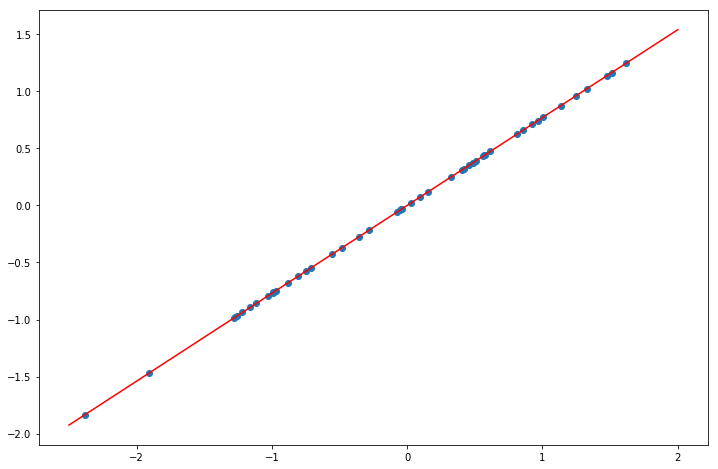

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_rec[:, 0], X_rec[:, 1])
x_plt = np.linspace(-2.5,2.0,100)
plt.plot(x_plt,(x_plt*U[1,0])/float(U[0,0]),'r')

U[:,0] is the vector on which the X points are porjected to.
To plot this vector U[:,0], we need a line equation. The vector here represents a point (x1,x2), and the direction of the vector is from the origin to that point. Using this we can get the slope of the line, m = U[1,0]/U[0,0]. Now we can plot it as x2 = m*x1

In [8]:
face_data = sio.loadmat('ex7faces.mat')
X = face_data['X']
X.shape

(5000, 1024)

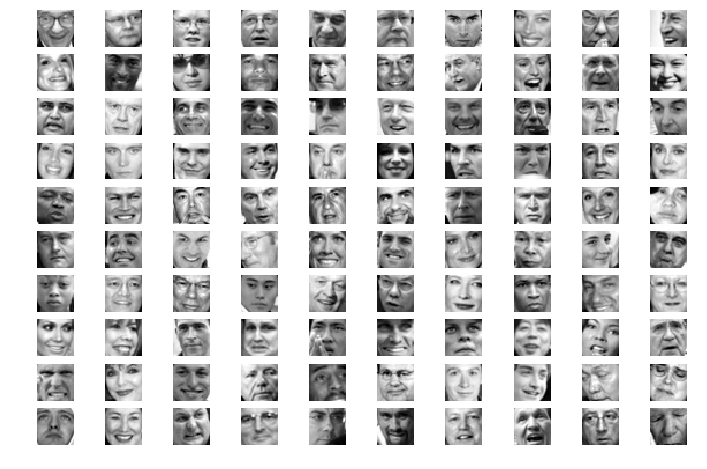

In [9]:
fig,ax = plt.subplots(10,10,figsize=(12,8),sharex=True,sharey=True)
for i in xrange(10):
    for j in xrange(10):
        face = X[10*i + j,:].reshape(32,32).T
        ax[i,j].imshow(face,cmap='gray')
        ax[i,j].axis('off')

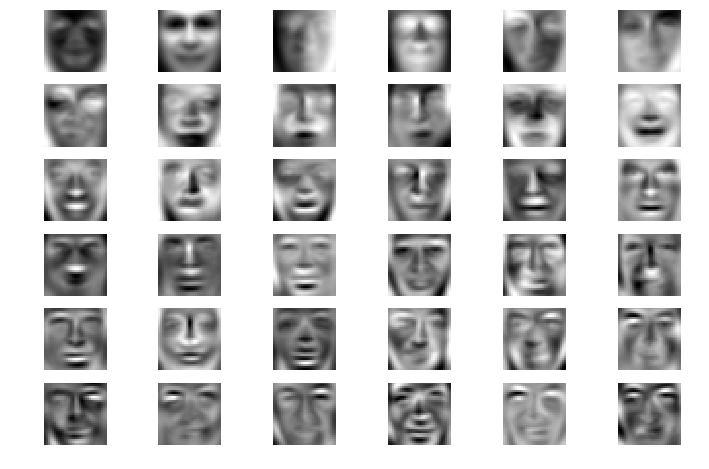

In [10]:
X_norm,mu,sig = featureNormalize(X)
U,S,V = pca(X_norm)
fig,ax = plt.subplots(6,6,figsize=(12,8),sharex=True,sharey=True)
for i in xrange(6):
    for j in xrange(6):
        eigen_face = U[:,6*i + j].reshape(32,32).T
        ax[i,j].imshow(eigen_face,cmap='gray')
        ax[i,j].axis('off')

In [11]:
K = 100
Z = projectData(X,U,K)
Z.shape

(5000, 100)

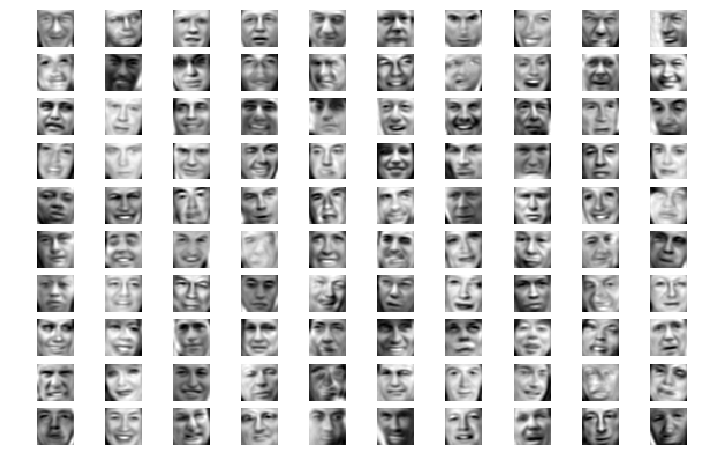

In [12]:
X_rec = recoverData(Z,U,K)
fig,ax = plt.subplots(10,10,figsize=(12,8),sharex=True,sharey=True)
for i in xrange(10):
    for j in xrange(10):
        face = X_rec[10*i + j,:].reshape(32,32).T
        ax[i,j].imshow(face,cmap='gray')
        ax[i,j].axis('off')